In [ ]:
from gan import load_files, audio_to_mel_spectrogram, bandpass_filter
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
audios = load_files("all")


In [ ]:
rnd_rd = random.randint(0, len(audios) - 1)
audio = audios[rnd_rd]
audio = bandpass_filter(audio,lowcut=1000, highcut=8000, fs=22050)
plt.plot(audio, color='blue')
plt.show()
spec, _,_ = audio_to_mel_spectrogram(audio, n_mels=128, target_shape=(128, 128))
plt.imshow(spec[0], aspect='auto', origin='lower', cmap='magma')

In [1]:
from ganV2 import BirdsongGANTrainer


trainer = BirdsongGANTrainer(
    bird_type="Bewick's Wren",
    latent_dim=100, 
    batch_size=20, 
    epochs=100, 
    n_mels=128, 
    shape=(128, 128)
)

print("[*] Начало обучения...")
trainer.train()
trainer.save_models(gen_path='Gv5.pth', disc_path='Dv5.pth')

print("[*] Генерация аудио...")
trainer.generate_and_save_audio("generated_bird_v5.wav")
print("[+] Готово: файл сохранен")


[*] Начало обучения...
[1/100] D_loss=1.3821  G_loss=0.7423
[2/100] D_loss=1.3632  G_loss=0.8051
[3/100] D_loss=1.3669  G_loss=0.7005
[4/100] D_loss=1.3833  G_loss=0.8178
[5/100] D_loss=1.3704  G_loss=0.7147
[6/100] D_loss=1.3629  G_loss=0.7351
[7/100] D_loss=1.3806  G_loss=0.6912
[8/100] D_loss=1.3756  G_loss=0.7033
[9/100] D_loss=1.3952  G_loss=0.6981
[10/100] D_loss=1.3555  G_loss=0.7213
[11/100] D_loss=1.3601  G_loss=0.7313
[12/100] D_loss=1.3703  G_loss=0.6917
[13/100] D_loss=1.3852  G_loss=0.7061
[14/100] D_loss=1.3730  G_loss=0.6850
[15/100] D_loss=1.3708  G_loss=0.7093
[16/100] D_loss=1.4074  G_loss=0.6849
[17/100] D_loss=1.3666  G_loss=0.6797
[18/100] D_loss=1.3929  G_loss=0.7018
[19/100] D_loss=1.3666  G_loss=0.6923
[20/100] D_loss=1.3482  G_loss=0.6819
[21/100] D_loss=1.3700  G_loss=0.6864
[22/100] D_loss=1.3843  G_loss=0.7395
[23/100] D_loss=1.3768  G_loss=0.6903
[24/100] D_loss=1.4055  G_loss=0.7116
[25/100] D_loss=1.3742  G_loss=0.6868
[26/100] D_loss=1.4263  G_loss=0.715

[INFO] Saved: generated_bird0_v5.wav


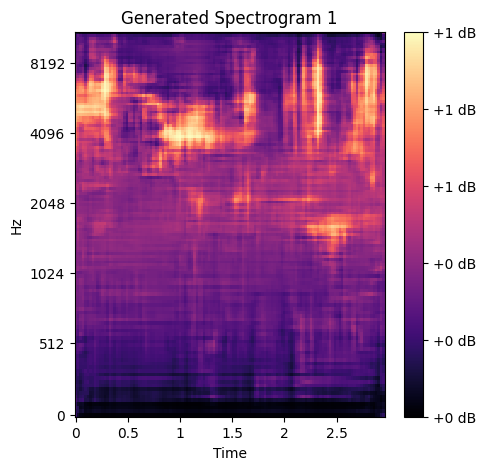

[INFO] Saved: generated_bird1_v5.wav


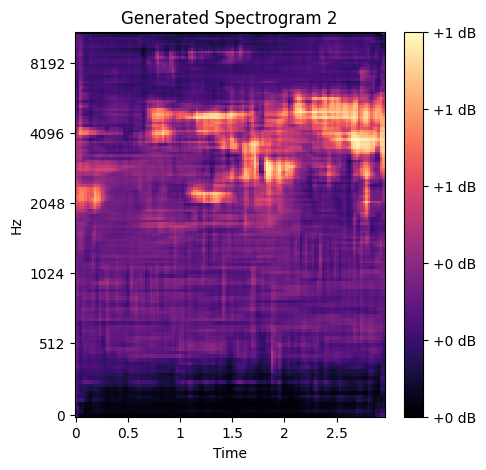

[INFO] Saved: generated_bird2_v5.wav


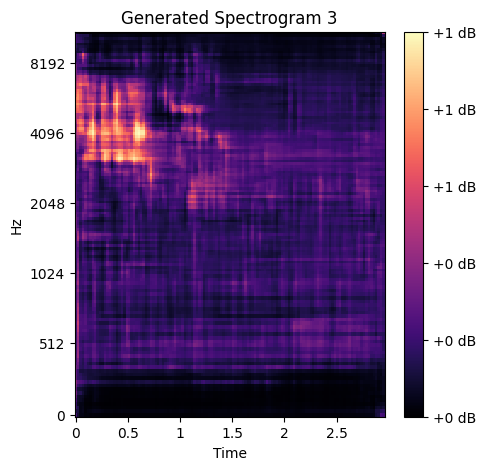

[INFO] Saved: generated_bird3_v5.wav


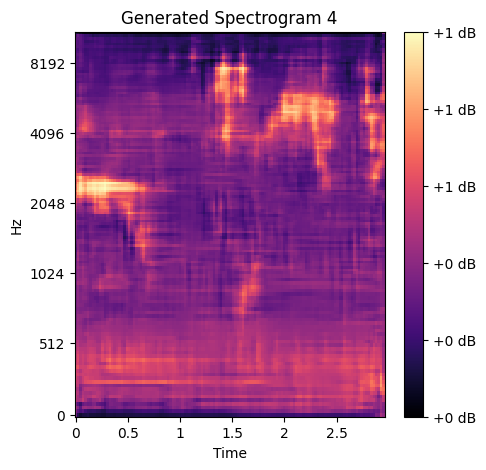

[INFO] Saved: generated_bird4_v5.wav


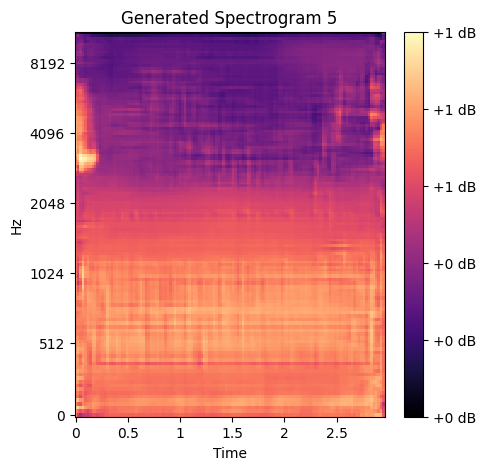

In [2]:
import torch
import matplotlib.pyplot as plt
import librosa.display
 
 
for i in range(5):
    z = torch.randn(1, trainer.latent_dim).to(trainer.device)  # случайный латентный вектор
    fake_spec = trainer.G(z).cpu().squeeze().detach().numpy()  # Генерация спектрограммы

    # Нормализация спектрограммы
    fake_spec = (fake_spec - fake_spec.min()) / (fake_spec.max() - fake_spec.min())
    trainer.generate_and_save_audio("generated_bird"+str(i)+"_v5.wav")

    # Строим и сохраняем спектрограмму
    plt.figure(figsize=(5, 5))
    librosa.display.specshow(fake_spec, x_axis='time', y_axis='mel', sr=22050)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Generated Spectrogram {i+1}')

    plt.show()


In [ ]:
from gan import BirdsongGANTrainer


trainer = BirdsongGANTrainer(
    bird_type="Bewick's Wren",
    latent_dim=100, 
    batch_size=16, 
    epochs=50, 
    n_mels=128, 
    shape=(128,128)
)

print("[*] Начало обучения...")
trainer.train()
trainer.save_models(gen_path='Gv5_simpl.pth', disc_path='Dv5_simpl.pth')

print("[*] Генерация аудио...")
trainer.generate_and_save_audio("generated_bird_v5_simpl.wav")
print("[+] Готово: файл сохранен")

[*] Начало обучения...
[1/50] D_loss=1.3911  G_loss=0.7013
[2/50] D_loss=1.3620  G_loss=0.6858
[3/50] D_loss=1.3554  G_loss=0.6673
[4/50] D_loss=1.3577  G_loss=0.6652
[5/50] D_loss=1.3171  G_loss=0.6986
[6/50] D_loss=1.3819  G_loss=0.6732
[7/50] D_loss=1.3832  G_loss=0.6954
[8/50] D_loss=1.3407  G_loss=0.7050
[9/50] D_loss=1.3334  G_loss=0.7365
[10/50] D_loss=1.3651  G_loss=0.6762
[11/50] D_loss=1.3887  G_loss=0.7401
[12/50] D_loss=1.4199  G_loss=0.6948
[13/50] D_loss=1.3543  G_loss=0.6782
[14/50] D_loss=1.4048  G_loss=0.7383
[15/50] D_loss=1.3479  G_loss=0.6670
[16/50] D_loss=1.3737  G_loss=0.7103
[17/50] D_loss=1.3825  G_loss=0.7264
[18/50] D_loss=1.3712  G_loss=0.7300
[19/50] D_loss=1.3846  G_loss=0.7160
[20/50] D_loss=1.3937  G_loss=0.6916
[21/50] D_loss=1.3851  G_loss=0.7145
[22/50] D_loss=1.4204  G_loss=0.7087
[23/50] D_loss=1.3811  G_loss=0.7450
[24/50] D_loss=1.3858  G_loss=0.6925
[25/50] D_loss=1.3924  G_loss=0.6727
[26/50] D_loss=1.3760  G_loss=0.6586
[27/50] D_loss=1.3767  G

[INFO] Saved: generated_bird_simple0_v1.wav


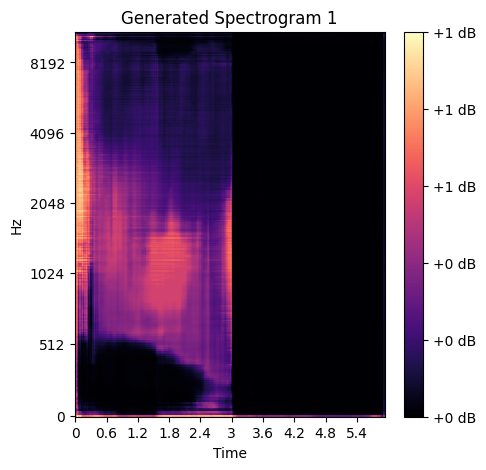

[INFO] Saved: generated_bird_simple1_v1.wav


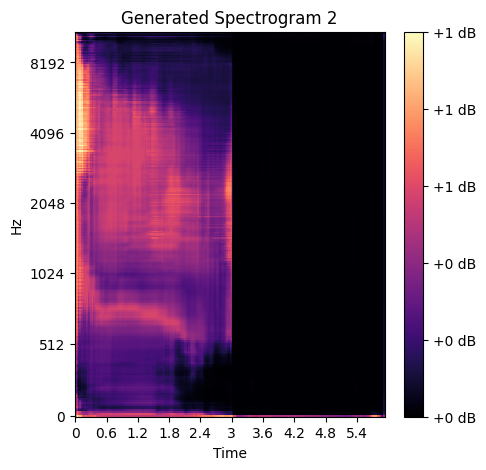

[INFO] Saved: generated_bird_simple2_v1.wav


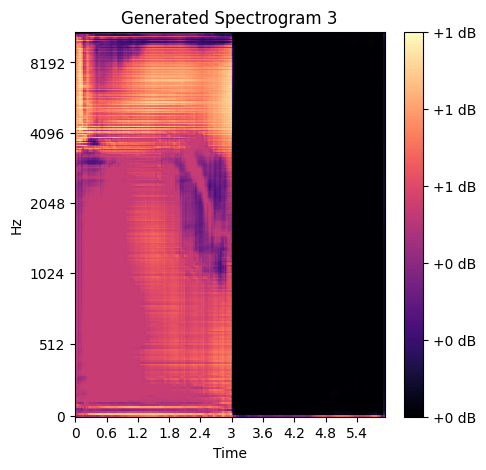

[INFO] Saved: generated_bird_simple3_v1.wav


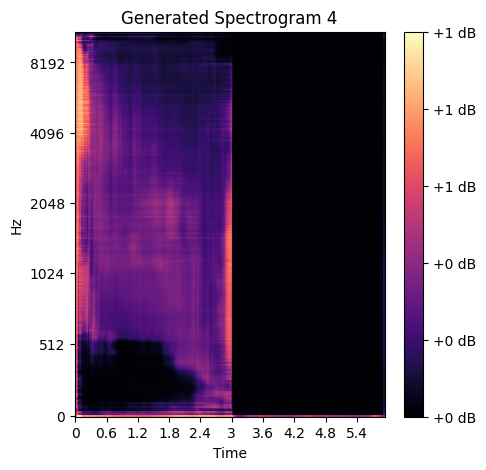

[INFO] Saved: generated_bird_simple4_v1.wav


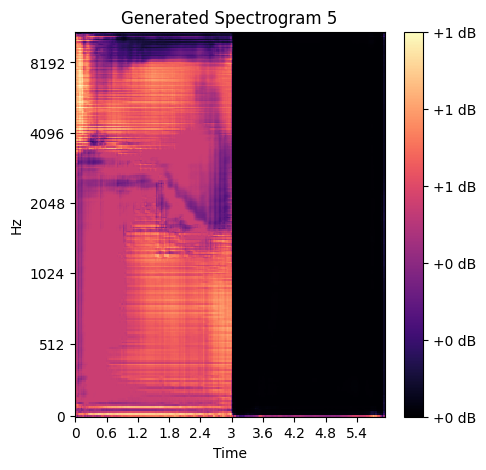

In [2]:
import torch
import matplotlib.pyplot as plt
import librosa.display
 
 
for i in range(5):
    z = torch.randn(1, trainer.latent_dim).to(trainer.device)  # случайный латентный вектор
    fake_spec = trainer.G(z).cpu().squeeze().detach().numpy()  # Генерация спектрограммы

    # Нормализация спектрограммы
    fake_spec = (fake_spec - fake_spec.min()) / (fake_spec.max() - fake_spec.min())
    trainer.generate_and_save_audio("generated_bird_simple"+str(i)+"_v1.wav")

    # Строим и сохраняем спектрограмму
    plt.figure(figsize=(5, 5))
    librosa.display.specshow(fake_spec, x_axis='time', y_axis='mel', sr=22050)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Generated Spectrogram {i+1}')

    plt.show()